In [8]:
#FLOOR 1

bi214activity = (0.05168/0.45)/0.00034
w = bi214activity*609.321*1.602e-16*(1/70)
print(w, "Sv/s")

dosebi214 = w*(1/0.01)*1000*(3.154e7)
print(dosebi214, "mrem/year")

Rn_activity = bi214activity*1.00359

W_MeV_per_decay = 5.49*20+6*20+1.02*1/3+3.27*1/3+ 7.69*20

W_MeV_per_sec=W_MeV_per_decay*Rn_activity
W_J_per_sec= 1.602e-13*W_MeV_per_sec
W_J_per_yr=W_J_per_sec * 3.14e7

mSv_per_yr=W_J_per_yr/70e-3

print("The effective dose is {:.5f} mSv/yr".format(mSv_per_yr))

4.710225421714284e-13 Sv/s
1.4856050980086852 mrem/year
The effective dose is 9.37942 mSv/yr


In [9]:
#FLOOR 2

bi214activity = (0.06037/0.45)/0.00034
w = bi214activity*609.321*1.602e-16*(1/70)
print(w, "Sv/s")

dosebi214 = w*(1/0.01)*1000*(3.154e7)
print(dosebi214, "mrem/year")

Rn_activity = bi214activity*1.00359

W_MeV_per_decay = 5.49*20+6*20+1.02*1/3+3.27*1/3+ 7.69*20

W_MeV_per_sec=W_MeV_per_decay*Rn_activity
W_J_per_sec= 1.602e-13*W_MeV_per_sec
W_J_per_yr=W_J_per_sec * 3.14e7

mSv_per_yr=W_J_per_yr/70e-3

print("The effective dose is {:.5f} mSv/yr".format(mSv_per_yr))

5.502250555512605e-13 Sv/s
1.7354098252086756 mrem/year
The effective dose is 10.95657 mSv/yr


In [11]:
#FLOOR 3

bi214activity = (0.05851/0.45)/0.00034
w = bi214activity*609.321*1.602e-16*(1/70)
print(w, "Sv/s")

dosebi214 = w*(1/0.01)*1000*(3.154e7)
print(dosebi214, "mrem/year")

Rn_activity = bi214activity*1.00359

W_MeV_per_decay = 5.49*20+6*20+1.02*1/3+3.27*1/3+ 7.69*20

W_MeV_per_sec=W_MeV_per_decay*Rn_activity
W_J_per_sec= 1.602e-13*W_MeV_per_sec
W_J_per_yr=W_J_per_sec * 3.14e7

mSv_per_yr=W_J_per_yr/70e-3

print("The effective dose is {:.5f} mSv/yr".format(mSv_per_yr))

5.332726188554621e-13 Sv/s
1.6819418398701276 mrem/year
The effective dose is 10.61900 mSv/yr


In [14]:
def effective_dose(c):
    # Radiation energy emitted by Bi-214
    bi214activity = (c/0.45)/0.00034
    w = bi214activity * 609.321 * 1.602e-16 * (1 / 70)

    # Dose from Bi-214 in mrem/year
    dose_bi214 = w * (1 / 0.01) * 1000 * (3.154e7)

    # Rn-222 activity
    rn_activity = bi214activity * 1.00359

    # Energy per decay for Rn-222
    W_MeV_per_decay = 5.49 * 20 + 6 * 20 + 1.02 * 1 / 3 + 3.27 * 1 / 3 + 7.69 * 20

    # Energy per second for Rn-222
    W_MeV_per_sec = W_MeV_per_decay * rn_activity

    # Convert energy to joules per second
    W_J_per_sec = 1.602e-13 * W_MeV_per_sec

    # Convert joules per second to joules per year
    W_J_per_yr = W_J_per_sec * 3.14e7

    # Convert joules to millisieverts per year
    mSv_per_yr = W_J_per_yr / 70e-3

    return mSv_per_yr

#uncertainty 1
c =0.01114
effective_dose_value = effective_dose(c)
print("uncertainty 1 {:.5f} mSv/yr".format(effective_dose_value))


#uncertainty 2
c=0.01419
effective_dose_value = effective_dose(c)
print("uncertainty 2 {:.5f} mSv/yr".format(effective_dose_value))


#uncertainty 3
c=0.00989
effective_dose_value = effective_dose(c)
print("uncertainty 3 {:.5f} mSv/yr".format(effective_dose_value))



uncertainty 1 2.02180 mSv/yr
uncertainty 2 2.57535 mSv/yr
uncertainty 3 1.79494 mSv/yr


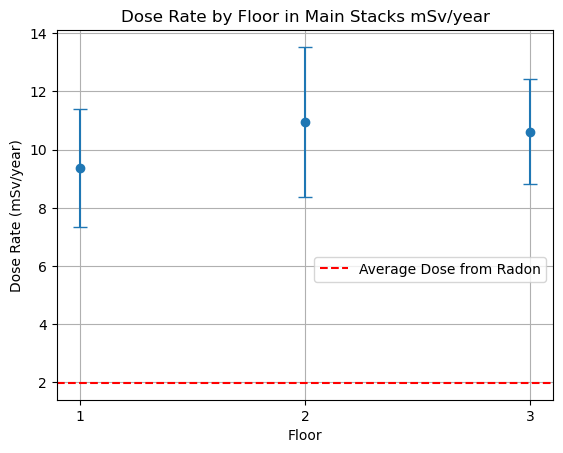

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.array([1, 2, 3])
y = np.array([9.37942, 10.95657, 10.61900])  # Dose rate in mSv per year
errors = np.array([2.02180, 2.57535, 1.79494])  # Standard deviation for error bars

plt.errorbar(x, y, yerr=errors, fmt='o', capsize=5)

# Plot horizontal line at y = 1.98
plt.axhline(y=1.98, color='red', linestyle='--', label='Average Dose from Radon')

plt.xlabel('Floor')
plt.ylabel('Dose Rate (mSv/year)')
plt.title('Dose Rate by Floor in Main Stacks mSv/year')

plt.legend(loc='lower right', bbox_to_anchor=(1,.3))


plt.xticks(x)

plt.grid(True)
plt.show()

**RATE EQUATIONS**

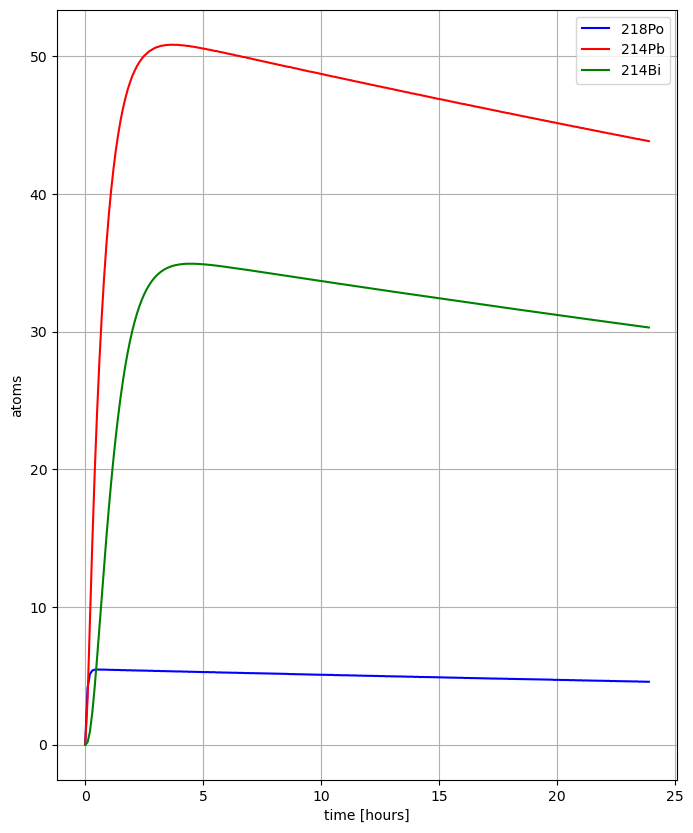

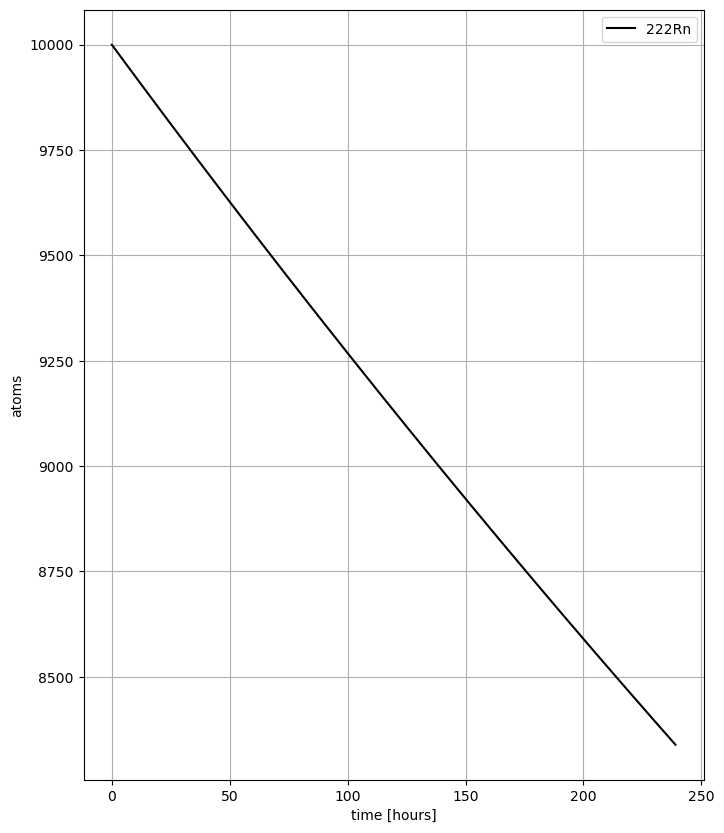

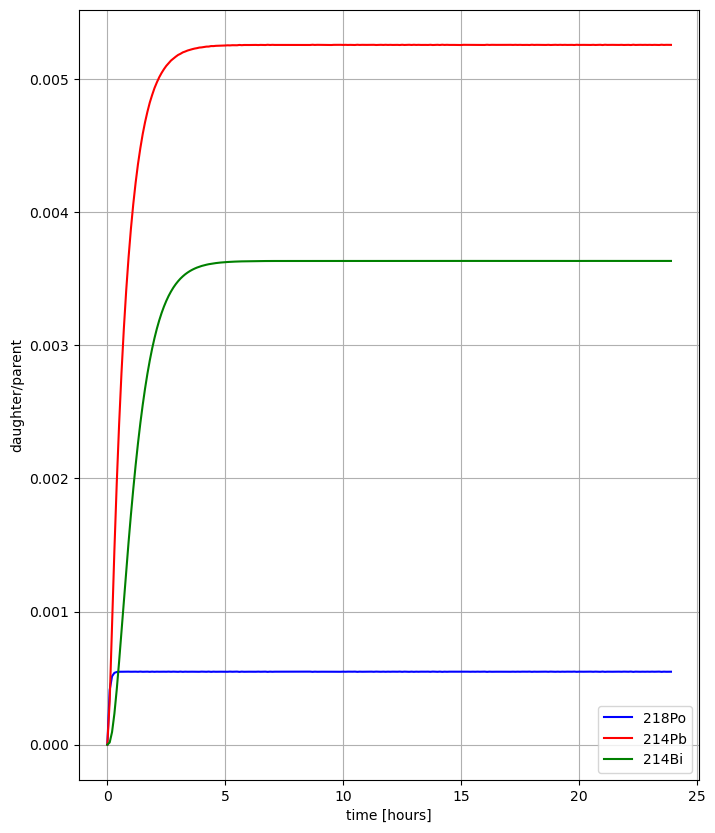

In [26]:
# calculate electron trajectories through a short magnetic lens
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
#import scipy.special as sp
#from scipy import interpolate


A0 = 10000
T0 = 3.8*24/np.log(2)
T1 = 3/60/np.log(2)
T2 = 28.6/60/np.log(2)
T3 = 19.7/60/np.log(2)


def rates(t, y):
    ydot = [0, 0, 0, 0]
    ydot[0] = - y[0]/T0
    ydot[1] = y[0]/T0 - y[1]/T1
    ydot[2] = y[1]/T1 - y[2]/T2
    ydot[3] = y[2]/T2 - y[3]/T3
    return ydot

sol = solve_ivp(rates, [0, 24], [A0, 0, 0, 0],t_eval=np.arange(240)*.1)

t=np.arange(240)*.1

plt.ion()
plt.figure(figsize=(8,10))
plt.plot(t,sol.y[1],'b',label='218Po')
plt.plot(t,sol.y[2],'r',label='214Pb')
plt.plot(t,sol.y[3],'g',label='214Bi')
plt.grid()
plt.xlabel('time [hours]')
plt.ylabel('atoms')
plt.legend()

plt.figure(figsize=(8,10))
plt.plot(sol.y[0],'k',label='222Rn')
plt.grid()
plt.xlabel('time [hours]')
plt.ylabel('atoms')
plt.legend()

plt.ion()
plt.figure(figsize=(8,10))
plt.plot(t,sol.y[1]/sol.y[0],'b',label='218Po')
plt.plot(t,sol.y[2]/sol.y[0],'r',label='214Pb')
plt.plot(t,sol.y[3]/sol.y[0],'g',label='214Bi')
plt.grid()
plt.xlabel('time [hours]')
plt.ylabel('daughter/parent')
plt.legend()
